In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt


In [2]:
# some helper functions for the analysis


def rename_countries(x,country_names):
    for key,val in country_names.items():
        x.cntry.loc[x.cntry == key] = val
def rename_rounds(x, rounds):
    for key,val in rounds.items():
        x.essround.loc[x.essround == key] = val


def return_ideos(x,cols,var):
    """
 Better to have the df in a tidy format 
    """
    ideo = x[cols]
    #ideo = ideo.loc[(ideo["país"] != "Italy") & (ideo["país"] != "Czech Republic")]
   
    return ideo







def create_validity_table(var,valid_var,column):

    """
Not all responses are valid. This fn prints a latex table to show that.
    """

    total_N = var[column].value_counts().rename("total_N")
    valid_N = valid_var[column].value_counts().rename("valid_N")

    validity_table = pd.concat([total_N, valid_N], axis = 1)
    validity_table["fraction_valid"] = validity_table.valid_N.div(validity_table.total_N, \
                                                                  axis = "index").round(2)
    #validity_table = validity_table.drop("valid_N",axis = 1)

    print(validity_table.to_latex())




def countries_plot(df,facet_col,map_val, year):

    """
All countries plot for a year of the ESS
    """

    sns.set(style="white", palette="muted", color_codes=True)


    g = (sns.FacetGrid(df,col = facet_col, col_wrap = 5)
         .map(sns.distplot, map_val,hist = False, kde_kws={"shade": True})
         .set_titles("{col_name}")
         .set_ylabels("Densidade")
         .set_xlabels("Posicionamento Esquerda-direita")
         .fig.subplots_adjust(hspace = 0.5))

    plt.suptitle("ESS {}- Posicionamento Político".format(year), y = 1.01)
    plt.savefig("ess_{}_plots.pdf".format(year), bbox_inches='tight',\
                pad_inches=0.2, dpi = 150)






In [3]:
# countries i'll plot

country_names = {"AT": "Áustria",  "BE": "Bélgica",  "CH": "Suíça", "CZ": "República Checa", "DE": "Alemanha" , "DK": "Dinamarca", "ES": "Espanha", "FI": "Finlândia", "FR": "França", "GB": "Reino Unido", "GR": "Grécia",  "HU": "Hungria", "IE": "Irlanda", "IL": "Israel", "IT": "Itália", "LU": "Luxemburgo", "NL": "Países Baixos", "NO": "Noruega", "PL": "Polônia", "PT": "Portugal", "SE": "Suécia", "SI": "Eslovênia"}


# dict to change rounds

ess_round_names = {1.0: "2002", 2.0: "2004", 3.0: "2006", 4.0: "2008", 5.0: "2010", 6.0: "2012", 7.0: "2014"}

In [4]:
# loading the datasets

ess2002 = pd.read_stata("ESS_DATA/2002/ESS1e06_5.dta",convert_categoricals = False)

ess2004 = pd.read_stata("ESS_DATA/2004/ESS2e03_5.dta",convert_categoricals = False)

ess2006  = pd.read_stata("ESS_DATA/2006/ESS3e03_6.dta",convert_categoricals = False)

ess2008  = pd.read_stata("ESS_DATA/2008/ESS4e04_4.dta",convert_categoricals = False)

ess2010  = pd.read_stata("ESS_DATA/2010/ESS5e03_3.dta",convert_categoricals = False)

ess2012  = pd.read_stata("ESS_DATA/2012/ESS6e02_3.dta",convert_categoricals = False)

ess2014  = pd.read_stata("ESS_DATA/2014/ESS7e02_1.dta",convert_categoricals = False)

In [5]:
#renaming the datasets

dfs = [ ess2002, ess2004, ess2006, ess2008, ess2010, ess2012, ess2014]

for i in dfs:
    rename_countries(i,country_names)



for i in dfs:
    rename_rounds(i,ess_round_names)
    


def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]


for i in dfs:
    print("{}".format(namestr(i,globals())), i["cntry"].unique(), len(i["cntry"].unique()), '\n')



/usr/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


['ess2002', 'i'] ['Áustria' 'Bélgica' 'Suíça' 'República Checa' 'Alemanha' 'Dinamarca'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'Hungria' 'Irlanda'
 'Israel' 'Itália' 'Luxemburgo' 'Países Baixos' 'Noruega' 'Polônia'
 'Portugal' 'Suécia' 'Eslovênia'] 22 

['ess2004', 'i'] ['Áustria' 'Bélgica' 'Suíça' 'República Checa' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'Hungria' 'Irlanda'
 'IS' 'Luxemburgo' 'Países Baixos' 'Noruega' 'Polônia' 'Portugal' 'Suécia'
 'Eslovênia' 'SK' 'TR' 'UA'] 25 

['ess2006', 'i'] ['Áustria' 'Bélgica' 'BG' 'Suíça' 'CY' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Hungria' 'Irlanda'
 'Países Baixos' 'Noruega' 'Polônia' 'Portugal' 'RU' 'Suécia' 'Eslovênia'
 'SK' 'UA'] 23 

['ess2008', 'i'] ['Bélgica' 'BG' 'Suíça' 'CY' 'República Checa' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'HR' 'Hungria'
 'Irlanda' 'Israel' 'LV' 'Países Baixos' 'Noruega' '

In [6]:
ideo_2002 = return_ideos(ess2002,["cntry", "essround", "lrscale"], "lrscale")


ideo_2004 = return_ideos(ess2004,["cntry", "essround", "lrscale",  "pspwght"], "lrscale")


ideo_2006 = return_ideos(ess2006,["cntry", "essround", "lrscale",  "pspwght"], "lrscale")


ideo_2008 = return_ideos(ess2008,["cntry", "essround", "lrscale",  "pspwght"], "lrscale")

ideo_2010 = return_ideos(ess2010,["cntry", "essround", "lrscale",  "pspwght"], "lrscale")


ideo_2012 = return_ideos(ess2012,["cntry", "essround", "lrscale", "pspwght"], "lrscale")


ideo_2014 = return_ideos(ess2014,["cntry", "essround", "lrscale", "pspwght"], "lrscale")




In [8]:
frames = [ideo_2002, ideo_2004, ideo_2006, ideo_2008, ideo_2010, ideo_2012, ideo_2014]

result = pd.concat(frames)

def return_valids(x,bound = 10 , var = "lrscale"):
    valid_ideo = x.loc[x[var]<=bound]
    return valid_ideo



#uk_ideo = result.loc[result.cntry == "Reino Unido"]
#valid_uk_ideo = uk_ideo.loc[uk_ideo["lrscale"] <= 10.0]


#alemanha_ideo["lrscale"].unique()


In [44]:
result.loc[result.cntry == "Alemanha"].count()
# a Polônia é o país com menor std para o pspwght

cntry       20490
essround    20490
lrscale     20490
pspwght     17571
dtype: int64

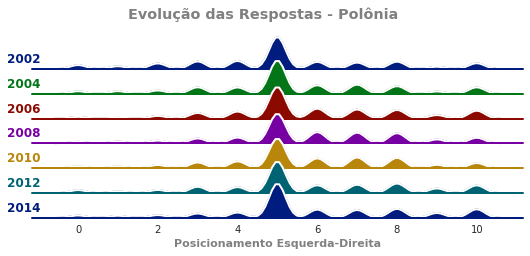

In [48]:
def evolution_plot(df,facet_row,cntry,var,xlabel):
    title = "Evolução das Respostas - {} ".format(cntry)


    cntry_ideo = df.loc[df.cntry == cntry]
    valid_cntry_ideo = cntry_ideo.loc[cntry_ideo[var] <= 10.0]




    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(valid_cntry_ideo, row= facet_row, hue= facet_row, aspect=15, size=.5, palette="dark")

    # Draw the densities in a few steps
    g.map(sns.kdeplot, var, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, var, clip_on=False, color="w", lw=2, bw=.2)   
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(-0.05, .3, label, fontweight="bold", color=color, 
                        ha="left",va="center",  transform=ax.transAxes)

    g.map(label, var)
    g.set_xlabels(xlabel,fontweight= "bold", color = "gray")
    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play will with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    plt.suptitle(title, y = 1.01,  color = "gray", fontweight= "bold")
    plt.savefig("ess_{}_plots.pdf".format(cntry), bbox_inches='tight',\
                                                  pad_inches=0.2, dpi = 250)


evolution_plot(result,facet_row = "essround",  cntry = "Polônia",var = "lrscale", xlabel = "Posicionamento Esquerda-Direita")



In [8]:
ideo_2002

           cntry  essround  lrscale
0        Áustria       1.0      6.0
1        Áustria       1.0      6.0
2        Áustria       1.0      5.0
3        Áustria       1.0      5.0
4        Áustria       1.0      5.0
5        Áustria       1.0     88.0
6        Áustria       1.0     88.0
7        Áustria       1.0      6.0
8        Áustria       1.0      5.0
9        Áustria       1.0      5.0
10       Áustria       1.0      5.0
11       Áustria       1.0      5.0
12       Áustria       1.0     88.0
13       Áustria       1.0      4.0
14       Áustria       1.0      4.0
15       Áustria       1.0      8.0
16       Áustria       1.0     88.0
17       Áustria       1.0      7.0
18       Áustria       1.0     88.0
19       Áustria       1.0     88.0
20       Áustria       1.0      5.0
21       Áustria       1.0     88.0
22       Áustria       1.0     88.0
23       Áustria       1.0      6.0
24       Áustria       1.0      5.0
25       Áustria       1.0      4.0
26       Áustria       1.0  

In [38]:
#create_validity_table(ideo_2002,valid_ideo_2002,"país")

create_validity_table(ideo_2014,valid_ideo_2014,"país")

\begin{tabular}{lrrr}
\toprule
{} &  total\_N &  valid\_N &  fraction\_valid \\
\midrule
Alemanha      &     3045 &     2922 &            0.96 \\
Bélgica       &     1769 &     1697 &            0.96 \\
Dinamarca     &     1502 &     1445 &            0.96 \\
EE            &     2051 &     1725 &            0.84 \\
Eslovênia     &     1224 &      940 &            0.77 \\
Espanha       &     1925 &     1662 &            0.86 \\
Finlândia     &     2087 &     2004 &            0.96 \\
França        &     1917 &     1803 &            0.94 \\
Hungria       &     1698 &     1409 &            0.83 \\
Irlanda       &     2390 &     1932 &            0.81 \\
Israel        &     2562 &     2399 &            0.94 \\
LT            &     2250 &     1560 &            0.69 \\
Noruega       &     1436 &     1400 &            0.97 \\
Países Baixos &     1919 &     1791 &            0.93 \\
Polônia       &     1615 &     1309 &            0.81 \\
Portugal      &     1265 &     1101 &            0.87 \\

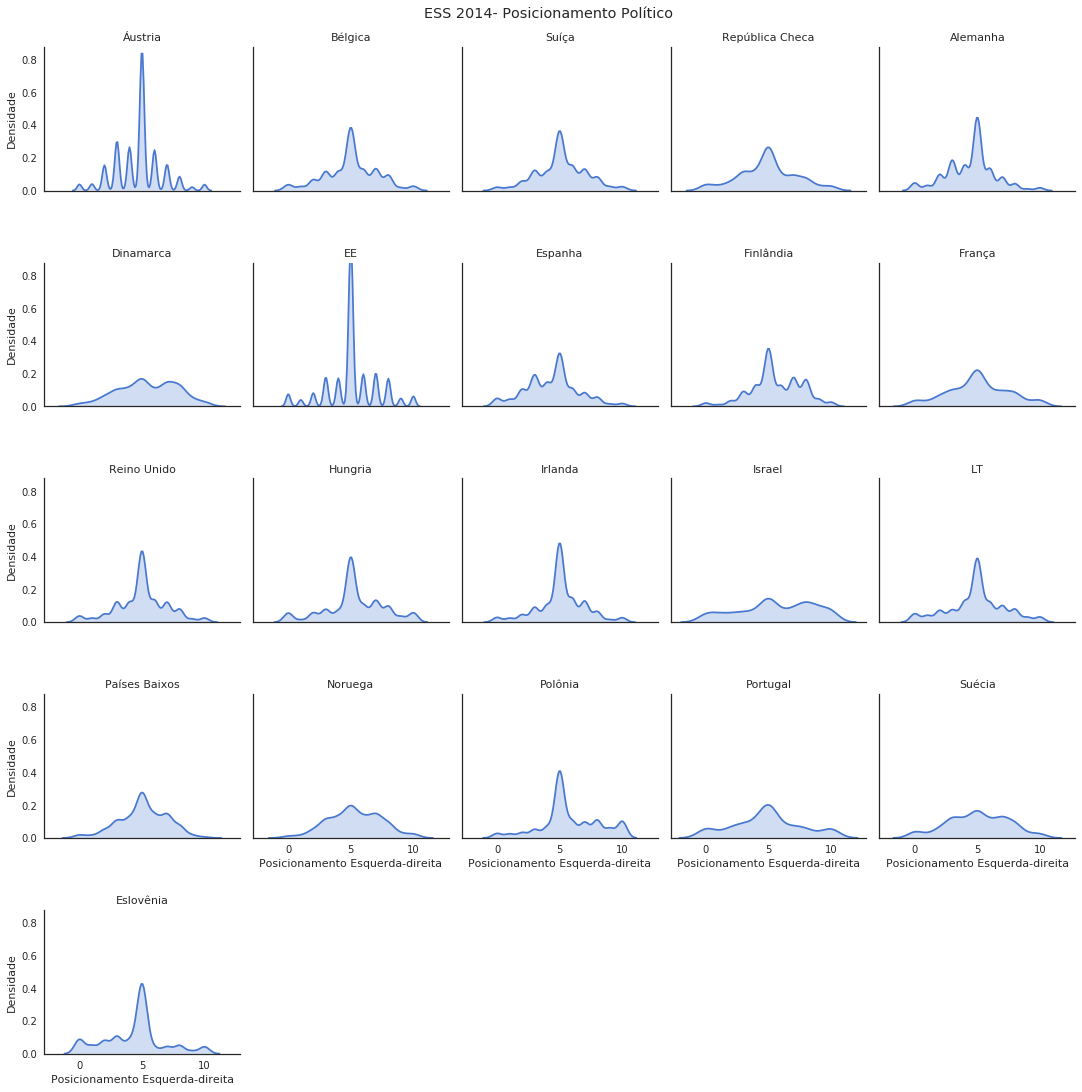

In [15]:
countries_plot(valid_ideo_2014,"país","lrscale",2014)
